# Maths for ML

Read this before continuing with hands on ML
[Methods-Mathematics-Calculus-Probability-Statistics](https://www.amazon.co.uk/Methods-Mathematics-Calculus-Probability-Statistics/dp/0486439453)

Or email this dude;

I am writing a book that I hope can serve such a purpose. Would you be interested in taking a look? If so, shoot me an email at mathintersectprogramming@gmail.com
Fair warning, I have shown it to a programmer who claimed some level of "math phobia," and they said the first chapter was too difficult. I rewrote that chapter since, and I think it is better, but I could use some feedback :)

[Andrew Ng Course](https://see.stanford.edu/Course/CS229) Or probably better [Fast AI Course](http://course.fast.ai/index.html)
____

# Calculus

[24 page guide and reference material](https://www.umiacs.umd.edu/~hal/courses/2013S_ML/math4ml.pdf)

[Matrix calculus for deep learning](http://parrt.cs.usfca.edu/doc/matrix-calculus/index.html)

[Matrix calculus book](http://www.janmagnus.nl/misc/mdc2007-3rdedition)

# Linear Algebra

## Norm

The norm of a vector $\textbf{u}$, noted $\left \Vert \textbf{u} \right \|$, is a measure of the length (a.k.a. the magnitude) of $\textbf{u}$. There are multiple possible norms, but the most common one (and the only one we will discuss here) is the Euclidian norm, which is defined as:

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

We could implement this easily in pure python, recalling that $\sqrt x = x^{\frac{1}{2}}$

In [2]:
v = [3, 1]

# **.5 = square root
norm = sum([e**2 for e in v])**.5

norm

3.1622776601683795

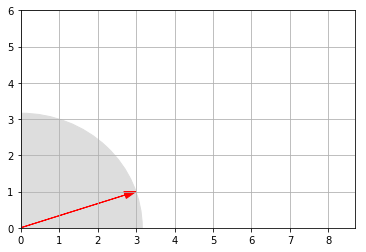

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

radius = norm
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector2d(v, color="red")
plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

## Zero, unit and normalized vectors
* A **zero-vector ** is a vector full of 0s.
* A **unit vector** is a vector with a norm equal to 1.
* The **normalized vector** of a non-null vector $\textbf{u}$, noted $\hat{\textbf{u}}$, is the unit vector that points in the same direction as $\textbf{u}$. It is equal to: $\hat{\textbf{u}} = \dfrac{\textbf{u}}{\left \Vert \textbf{u} \right \|}$

In [4]:
from sklearn.preprocessing import normalize
import numpy as np
import numpy.linalg as LA

n = np.asarray([[3, 1, 8], [2, 6, 8]])

print(n)

print(n / LA.norm(n))

[[3 1 8]
 [2 6 8]]
[[ 0.22485951  0.07495317  0.59962535]
 [ 0.14990634  0.44971901  0.59962535]]


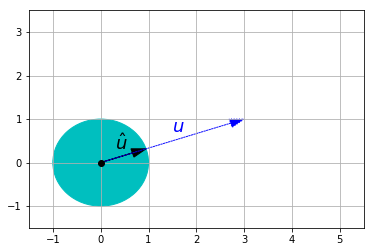

In [5]:
plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / LA.norm(v), color="k")
plot_vector2d(v, color="b", linestyle=":")
plt.text(0.3, 0.3, "$\hat{u}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$u$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

In [6]:
arr = [2, 6, 4]

# Vector to unit vector
def unit(a):
 return(a / LA.norm(a))

LA.norm(unit(arr))

1.0

In [7]:
v2 = [3, -7]

v3 = [2, 4, -1]

LA.norm(unit(v3))

1.0

## Dot Product

The sum of arrays multiplied by each i

$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$

where $\theta$ is the angle between $\textbf{u}$ and $\textbf{v}$.

Another way to calculate the dot product is:

$\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$

In [8]:
v = np.array([3, 1])
u = ([2, 5])

print(sum(vi * ui for vi, ui in zip(v, u)))

# e.g.
print((v[0]*u[0]) + (v[1]*u[1]))

# in python 3 we can do dot product using an '@' e.g.
u @ v

11
11


11

### Main properties
* The dot product is **commutative**: $\textbf{u} \cdot \textbf{v} = \textbf{v} \cdot \textbf{u}$.
* The dot product is only defined between two vectors, not between a scalar and a vector. This means that we cannot chain dot products: for example, the expression $\textbf{u} \cdot \textbf{v} \cdot \textbf{w}$ is not defined since $\textbf{u} \cdot \textbf{v}$ is a scalar and $\textbf{w}$ is a vector.
* This also means that the dot product is **NOT associative**: $(\textbf{u} \cdot \textbf{v}) \cdot \textbf{w} ≠ \textbf{u} \cdot (\textbf{v} \cdot \textbf{w})$ since neither are defined.
* However, the dot product is **associative with regards to scalar multiplication**: $\lambda \times (\textbf{u} \cdot \textbf{v}) = (\lambda \times \textbf{u}) \cdot \textbf{v} = \textbf{u} \cdot (\lambda \times \textbf{v})$
* Finally, the dot product is **distributive** over addition of vectors: $\textbf{u} \cdot (\textbf{v} + \textbf{w}) = \textbf{u} \cdot \textbf{v} + \textbf{u} \cdot \textbf{w}$.

### Calculating the angle between vectors
One of the many uses of the dot product is to calculate the angle between two non-zero vectors. Looking at the dot product definition, we can deduce the following formula:

$\theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \|} \right ) }$

Note that if $\textbf{u} \cdot \textbf{v} = 0$, it follows that $\theta = \dfrac{π}{2}$. In other words, if the dot product of two non-null vectors is zero, it means that they are orthogonal.

Note: $\theta$ (Theta) is typically denoted as a reference angle when solving a right triangle using sine, cosine, tangent, cosecant, scant, and cotangent.

Let's use this formula to calculate the angle between $\textbf{u}$ and $\textbf{v}$ (in radians):

In [9]:
def vector_angle(u, v):
    cos_theta = u @ v / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 0.868539395286 radians
      = 49.7636416907 degrees


Note: due to small floating point errors, `cos_theta` may be very slightly outside of the $[-1, 1]$ interval, which would make `arccos` fail. This is why we clipped the value within the range, using NumPy's `clip` function.

### Projecting a point onto an axis
The dot product is also very useful to project points onto an axis. The projection of vector $\textbf{v}$ onto $\textbf{u}$'s axis is given by this formula:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| ^2} \times \textbf{u}$

Which is equivalent to:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$


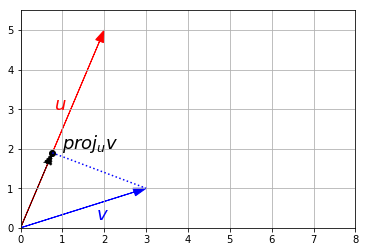

In [10]:
u_normalized = u / LA.norm(u)
proj = (v @ u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(1, 2, "$proj_u v$", color="k", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 8, 0, 5.5])
plt.grid()
plt.show()

## Matrices
A matrix is a rectangular array of scalars (ie. any number: integer, real or complex) arranged in rows and columns, for example:

\begin{bmatrix} 10 & 20 & 30 \\ 40 & 50 & 60 \end{bmatrix}

You can also think of a matrix as a list of vectors: the previous matrix contains either 2 horizontal 3D vectors or 3 vertical 2D vectors.

Matrices are convenient and very efficient to run operations on many vectors at a time. We will also see that they are great at representing and performing linear transformations such rotations, translations and scaling.

In [11]:
M = np.array([
    [2, 4, 6, 3],
    [3, 6, 4, 1],
    [7, 8, 4, 5]
])

M.shape

(3, 4)

### Indexing

Indexing works the same as arrays starting at 0 and going row then column e.g.

$ M_{r,c}$

In [12]:
M[1,2]

4

Note: Remember in maths indicies start at 1 but in programming they start at 0 so $M_{1,2}$ would be M[0,1]

### Matrix Norm

works the same way as vector norm

$\left \Vert \textbf{M} \right \| = \sqrt{\sum_{i}\sum_{j}{\vert\textbf{a}_{i, j}}\vert^2}$

In [13]:
LA.norm(M)

16.763054614240211

### Matrix multiplication
So far, matrix operations have been rather intuitive. But multiplying matrices is a bit more involved.

A matrix $Q$ of size $m \times n$ can be multiplied by a matrix $R$ of size $n \times q$. It is noted simply $QR$ without multiplication sign or dot. The result $P$ is an $m \times q$ matrix where each element is computed as a sum of products:

$P_{i,j} = \sum_{k=1}^n{Q_{i,k} \times R_{k,j}}$

The element at position $i,j$ in the resulting matrix is the sum of the products of elements in row $i$ of matrix $Q$ by the elements in column $j$ of matrix $R$.

$P =
\begin{bmatrix}
Q_{11} R_{11} + Q_{12} R_{21} + \cdots + Q_{1n} R_{n1} &
  Q_{11} R_{12} + Q_{12} R_{22} + \cdots + Q_{1n} R_{n2} &
    \cdots &
      Q_{11} R_{1q} + Q_{12} R_{2q} + \cdots + Q_{1n} R_{nq} \\
Q_{21} R_{11} + Q_{22} R_{21} + \cdots + Q_{2n} R_{n1} &
  Q_{21} R_{12} + Q_{22} R_{22} + \cdots + Q_{2n} R_{n2} &
    \cdots &
      Q_{21} R_{1q} + Q_{22} R_{2q} + \cdots + Q_{2n} R_{nq} \\
  \vdots & \vdots & \ddots & \vdots \\
Q_{m1} R_{11} + Q_{m2} R_{21} + \cdots + Q_{mn} R_{n1} &
  Q_{m1} R_{12} + Q_{m2} R_{22} + \cdots + Q_{mn} R_{n2} &
    \cdots &
      Q_{m1} R_{1q} + Q_{m2} R_{2q} + \cdots + Q_{mn} R_{nq}
\end{bmatrix}$

You may notice that each element $P_{i,j}$ is the dot product of the row vector $Q_{i,*}$ and the column vector $R_{*,j}$:

$P_{i,j} = Q_{i,*} \cdot R_{*,j}$

So we can rewrite $P$ more concisely as:

$P =
\begin{bmatrix}
Q_{1,*} \cdot R_{*,1} & Q_{1,*} \cdot R_{*,2} & \cdots & Q_{1,*} \cdot R_{*,q} \\
Q_{2,*} \cdot R_{*,1} & Q_{2,*} \cdot R_{*,2} & \cdots & Q_{2,*} \cdot R_{*,q} \\
\vdots & \vdots & \ddots & \vdots \\
Q_{m,*} \cdot R_{*,1} & Q_{m,*} \cdot R_{*,2} & \cdots & Q_{m,*} \cdot R_{*,q}
\end{bmatrix}$

![Visual Example of Matrix Multiplication](https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Matrix_multiplication_diagram_2.svg/320px-Matrix_multiplication_diagram_2.svg.png?1518184288664)

In [14]:
D = np.array([
    [2, 4, 6, 3],
    [3, 6, 4, 1],
    [7, 8, 4, 5],
    [4, 6, 7, 5]
])
E = M @ D
E

array([[ 70,  98,  73,  55],
       [ 56,  86,  65,  40],
       [ 86, 138, 125,  74]])

### Plotting a Matrix

We have already seen that vectors can been represented as points or arrows in N-dimensional space. Is there a good graphical representation of matrices? Well you can simply see a matrix as a list of vectors, so plotting a matrix results in many points or arrows. For example, let's create a $2 \times 4$ matrix `P` and plot it as points:

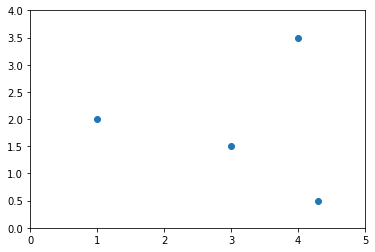

In [15]:
P = np.array([
    [3.0, 4.0, 1.0, 4.3],
    [1.5, 3.5, 2.0, 0.5]
])

x_cord, y_cords = P
plt.scatter(x_cord, y_cords)
plt.axis([0,5,0,4])
plt.show()

Of course we could also have stored the same 4 vectors as row vectors instead of column vectors, resulting in a $4 \times 2$ matrix (the transpose of $P$, in fact). It is really an arbitrary choice.

Since the vectors are ordered, you can see the matrix as a path and represent it with connected dots:

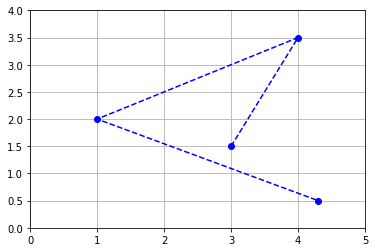

In [16]:
plt.plot(x_cord, y_cords, 'bo')
plt.plot(x_cord, y_cords, 'b--')
plt.axis([0,5,0,4])
plt.grid()
plt.show()

Or you can represent it as a polygon: matplotlib's `Polygon` class expects an $n \times 2$ NumPy array, not a $2 \times n$ array, so we just need to give it $P^T$:

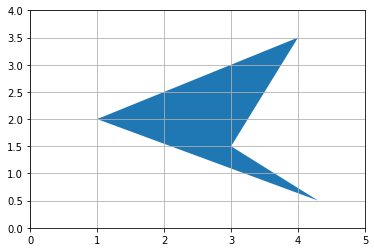

In [17]:
from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(P.T))
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

### Geometric applications of matrix operations
We saw earlier that vector addition results in a geometric translation, vector multiplication by a scalar results in rescaling (zooming in or out, centered on the origin), and vector dot product results in projecting a vector onto another vector, rescaling and measuring the resulting coordinate.

Similarly, matrix operations have very useful geometric applications.

#### Addition = multiple geometric translations
First, adding two matrices together is equivalent to adding all their vectors together. For example, let's create a $2 \times 4$ matrix $H$ and add it to $P$, and look at the result:

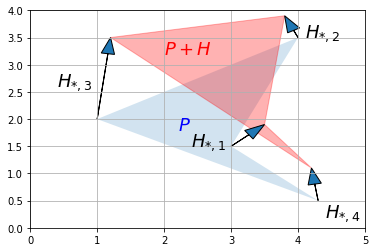

In [18]:
H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])
P_moved = P + H

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color="r"))
for vector, origin in zip(H.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.4, 1.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.4, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

If we add a matrix full of identical vectors, we get a simple geometric translation:

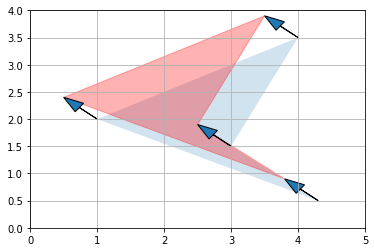

In [19]:
H2 = np.array([
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.4,  0.4,  0.4,  0.4]
    ])
P_translated = P + H2

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_translated.T, alpha=0.3, color="r"))
for vector, origin in zip(H2.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

### Scalar multiplication
Multiplying a matrix by a scalar results in all its vectors being multiplied by that scalar, so unsurprisingly, the geometric result is a rescaling of the entire figure. For example, let's rescale our polygon by a factor of 60% (zooming out, centered on the origin):

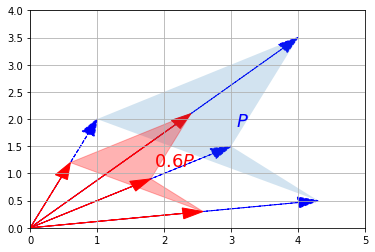

In [20]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()

P_rescaled = 0.60 * P
plot_transformation(P, P_rescaled, "$P$", "$0.6 P$", arrows=True)
plt.show()

### Matrix multiplication – Projection onto an axis
Matrix multiplication is more complex to visualize, but it is also the most powerful tool in the box.

Let's start simple, by defining a $1 \times 2$ matrix $U = \begin{bmatrix} 1 & 0 \end{bmatrix}$. This row vector is just the horizontal unit vector.

In [21]:
U = np.array([[1, 0]])

Now let's look at the dot product $U \cdot P$:

In [22]:
U @ P

array([[ 3. ,  4. ,  1. ,  4.3]])

These are the horizontal coordinates of the vectors in $P$. In other words, we just projected $P$ onto the horizontal axis:

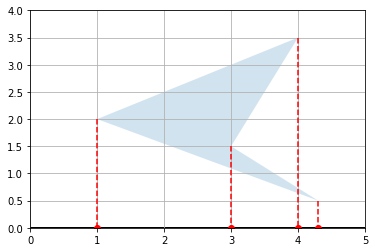

In [23]:
def plot_projection(U, P):
    U_P = U @ P
    
    axis_end = 100 * U
    plot_vector2d(axis_end[0], color="black")

    plt.gca().add_artist(Polygon(P.T, alpha=0.2))
    for vector, proj_coordinate in zip(P.T, U_P.T):
        proj_point = proj_coordinate * U
        plt.plot(proj_point[0][0], proj_point[0][1], "ro")
        plt.plot([vector[0], proj_point[0][0]], [vector[1], proj_point[0][1]], "r--")

    plt.axis([0, 5, 0, 4])
    plt.grid()
    plt.show()

plot_projection(U, P)

We can actually project on any other axis by just replacing $U$ with any other unit vector. For example, let's project on the axis that is at a 45° angle above the horizontal axis:

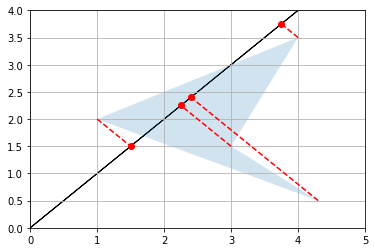

In [25]:
angle45 = 45 * np.pi / 180  # angle in radians
U_45 = np.array([[np.cos(angle45), np.sin(angle45)]])

plot_projection(U_45, P)

Good! Remember that the dot product of a unit vector and a matrix basically performs a projection on an axis and gives us the coordinates of the resulting points on that axis.

# Need to read up on trig

[sine](http://reference.wolfram.com/language/ref/Sin.html)
[cos](http://reference.wolfram.com/language/ref/Cos.html)

In [11]:
n = 10
s = 0
for i in range(1, n+1):
    s+=i
    
s

55

In [12]:
(n*(n+1))/2

55.0

In [14]:
s = 0
for i in range(1, n+1):
    s+=(i**2)
s

385

In [15]:
(n*(n+1)*((2*n)+1))/6

385.0

In [29]:
n = 2
if n%2 == 1:
    print((n**2)%2)

(((2*n)+1)**2) % 2
((2*n)+1) % 2

# ((2*n)+1) mod 2 = (((2*n)+1)**2) mod 2 = 1

1